In [176]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import skimage.io as io
import os

In [218]:
test_dir = '../data/test/images'

# Insert your result image folders here
result_dirs = [#'../data/test/results/unet combined avg/discrete',
                '../data/test/results/hello/results',
                '../data/test/results/hello/results']
               #'../data/test/results/unet combined vote six/discrete', 
               #'../data/test/results/unet patch/discrete']
#result_dirs = ['../data/test/results/unet combined avg/discrete']

# Change foreground threshold for patches here
foregroung_threshold = 0.25

In [219]:
# List all test image and results
img_paths = list(map(lambda x : os.path.join(test_dir, x), os.listdir(test_dir)))

results_paths = []
for res_dir in result_dirs:
    res_paths = list(map(lambda x : os.path.join(res_dir, x), os.listdir(res_dir)))
    results_paths.append(res_paths)

In [220]:
def normalize(img):
    if (np.max(img) > 1.0):
        return img / 255.0
    else:
        return img

In [221]:
def patch_to_label(patch, thresh):
    df = np.mean(patch)
    if df > thresh:
        return 1
    else:
        return 0

def mask_to_submission(img, mask, thresh, patch_size=16, color=[0.2, 0.0, 0.0]):
    overlay = np.zeros(img.shape)
    for j in range(0, img.shape[1], patch_size):
        for i in range(0, img.shape[0], patch_size):
            patch = mask[i:i + patch_size, j:j + patch_size]
            label = patch_to_label(patch, thresh)
            overlay[i:i + patch_size, j:j + patch_size, 0] = color[0] * label
            overlay[i:i + patch_size, j:j + patch_size, 1] = color[1] * label
            overlay[i:i + patch_size, j:j + patch_size, 2] = color[2] * label
    return np.minimum(img + overlay, 1.0)

In [229]:
def plot_result_comparisons(img_paths, results_paths, show_img=True, show_mask=True, show_patches=False):

    num_results = len(result_dirs)
    rows = len(img_paths)
    cols = 0
    if show_img:
        cols += 1
    if show_mask:
        cols += num_results
    if show_patches:
        cols += num_results
    
    # Chose threshold 
    threshold = np.repeat(foregroung_threshold, rows)
    #threshold = [0.25, 0.5]
        
    for i in range(rows):
        
        fig = plt.figure(figsize=(15, (1.0 / cols) * 15))
            
        index = 1
        
        img = normalize(io.imread(img_paths[i]))
        img_name = os.path.split(img_paths[i])[-1]
        
        if show_img:
            ax = fig.add_subplot(1, cols, index)
            index += 1
            plt.axis('off')
            ax.set_title('img: ' + img_name)
            plt.imshow(img)

        for j in range(num_results):
            res = normalize(io.imread(results_paths[j][i], as_gray=True))
            res_name = os.path.split(results_paths[j][i])[-1]
            if show_patches:
                patch_img = mask_to_submission(img, res, thresh=threshold[j])
                ax = fig.add_subplot(1, cols, index)
                index += 1
                plt.axis('off')
                ax.set_title('patches' + str(j) + ': ' + res_name)
                plt.imshow(patch_img)
            if show_mask:
                ax = fig.add_subplot(1, cols, index)
                index += 1
                plt.axis('off')
                ax.set_title('mask' + str(j) + ': ' + res_name)
                plt.imshow(res, cmap='gray')
        plt.show()


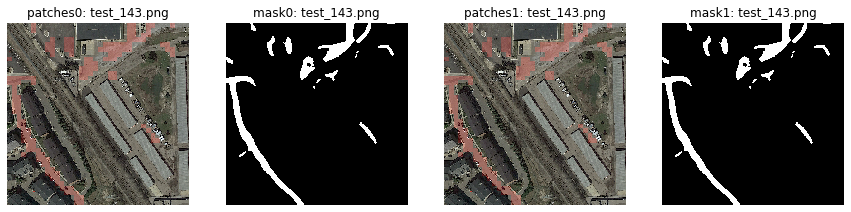

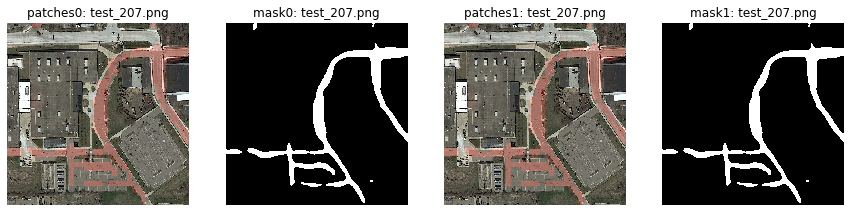

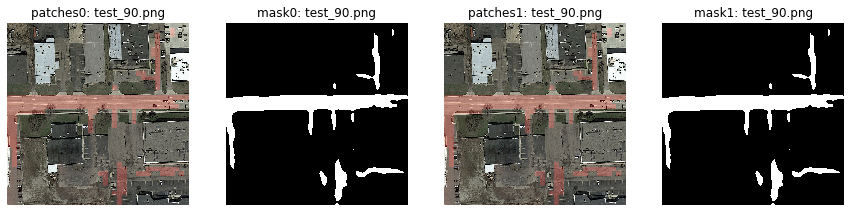

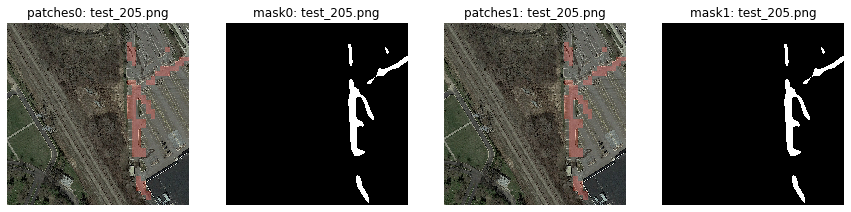

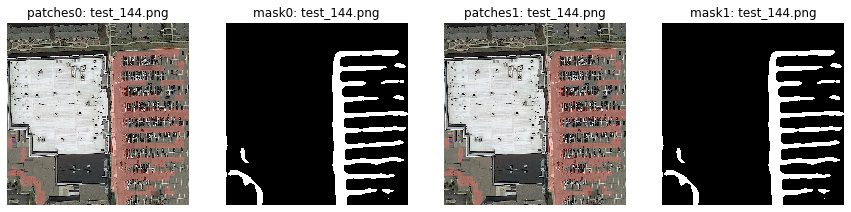

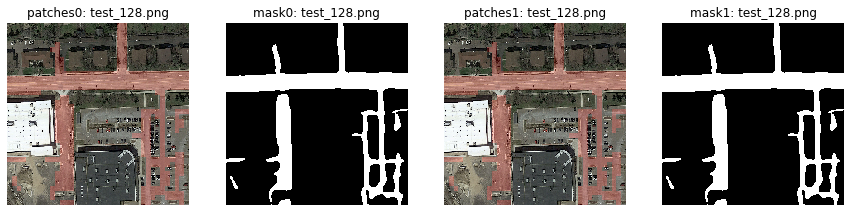

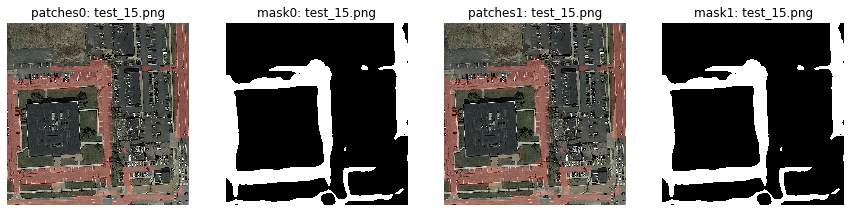

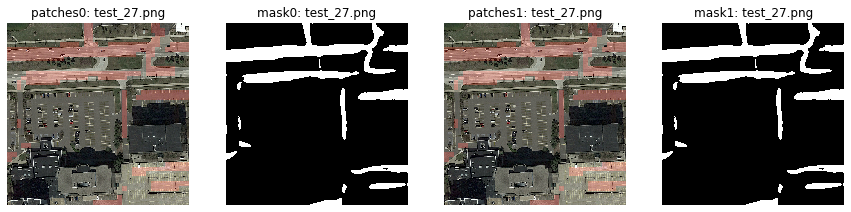

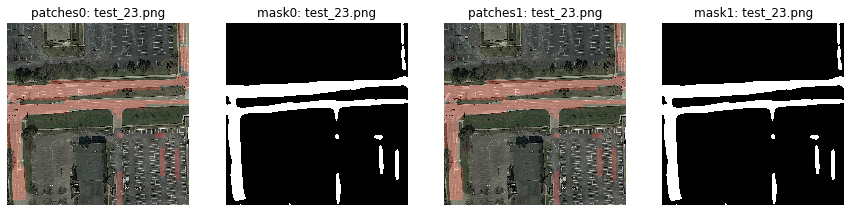

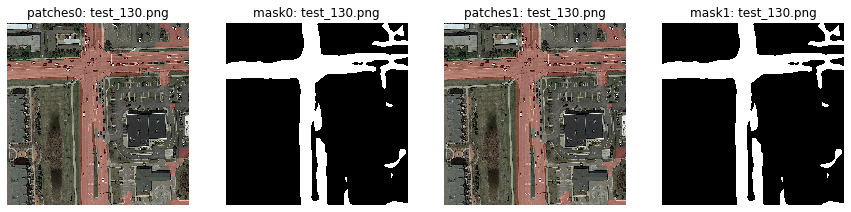

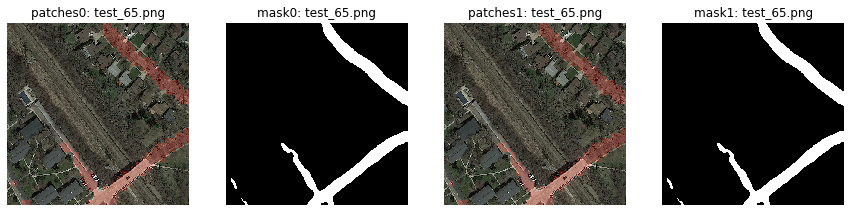

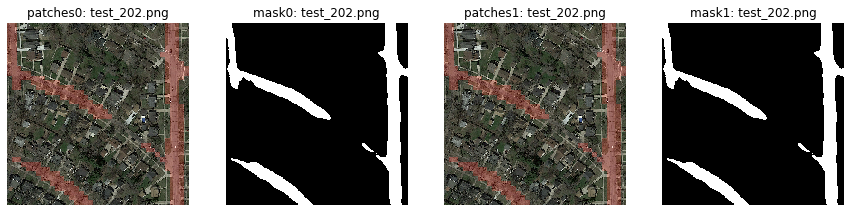

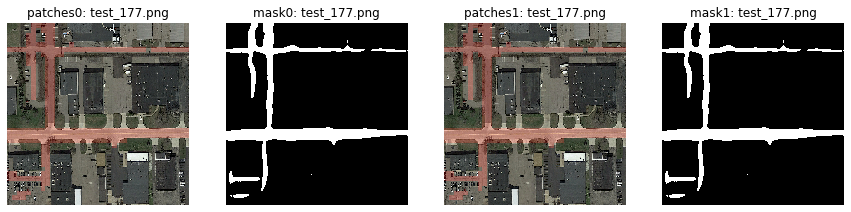

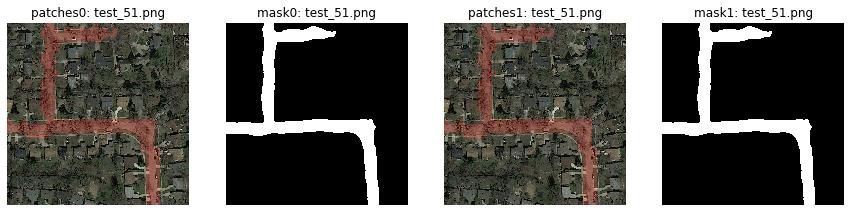

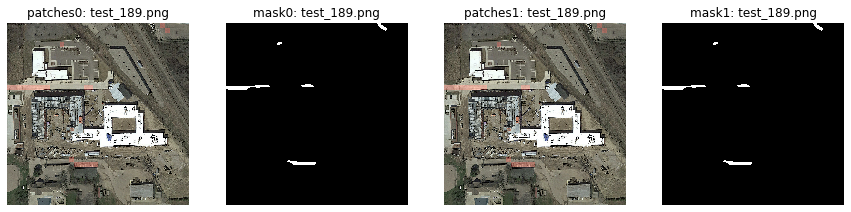

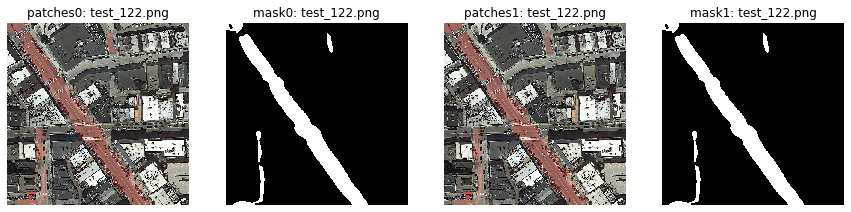

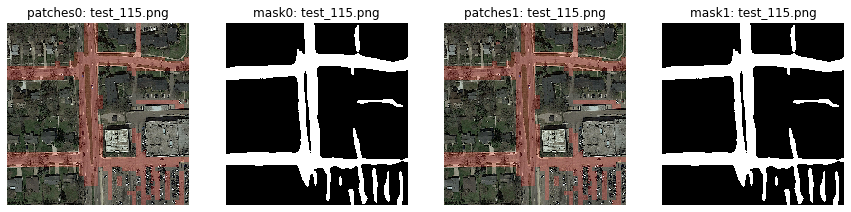

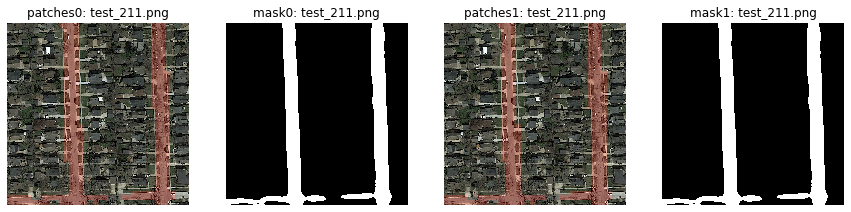

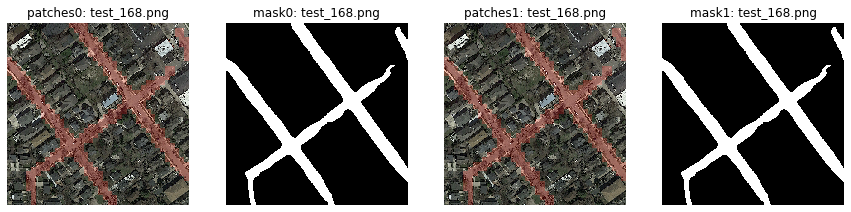

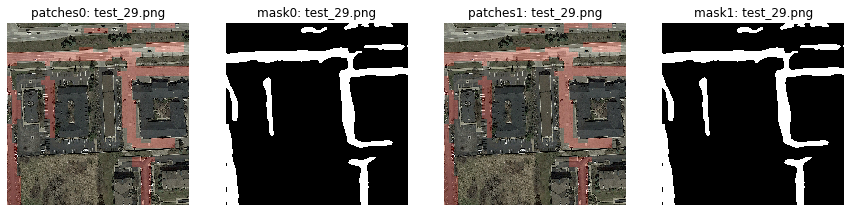

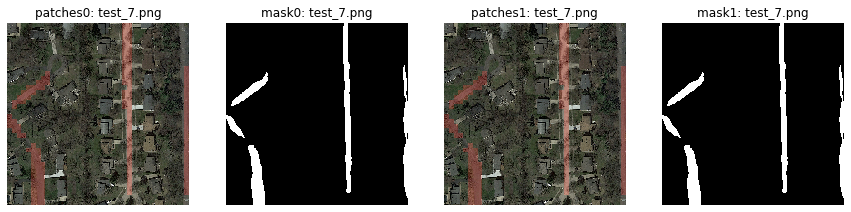

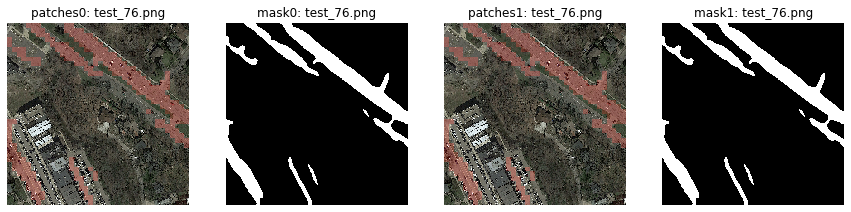

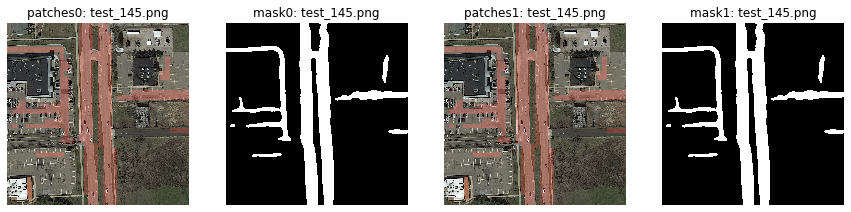

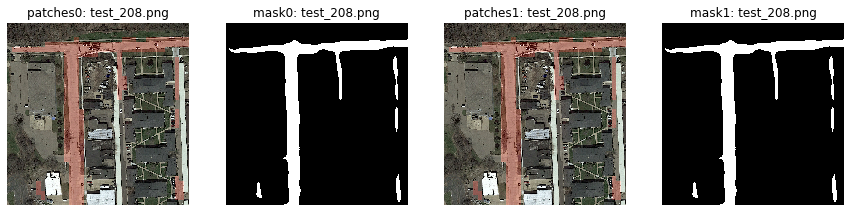

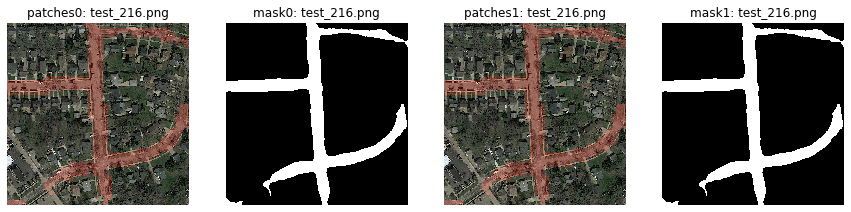

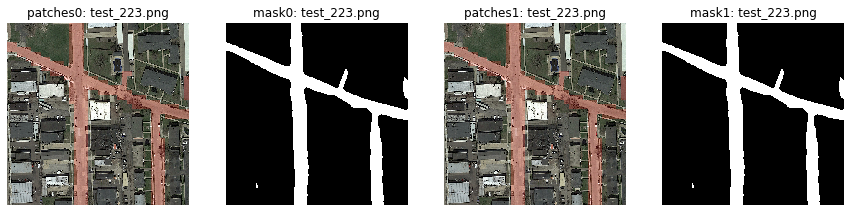

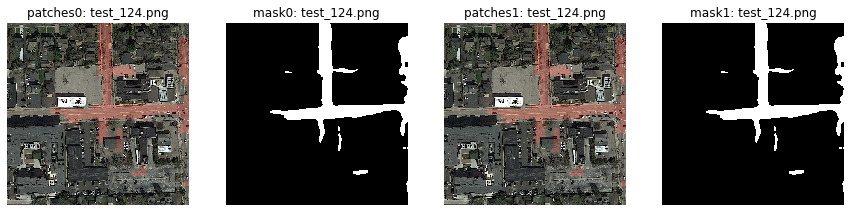

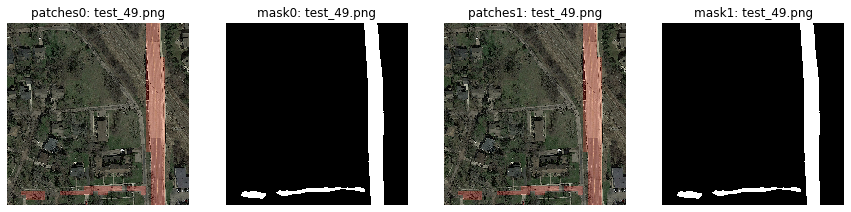

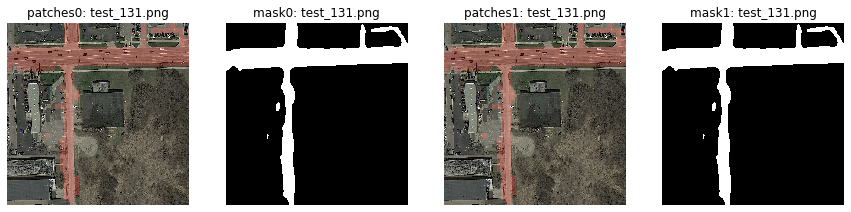

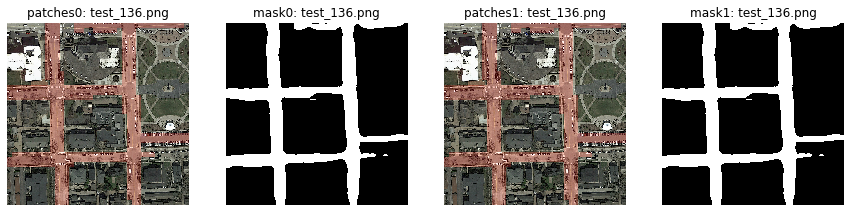

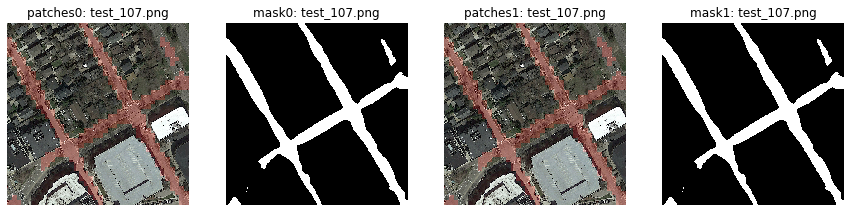

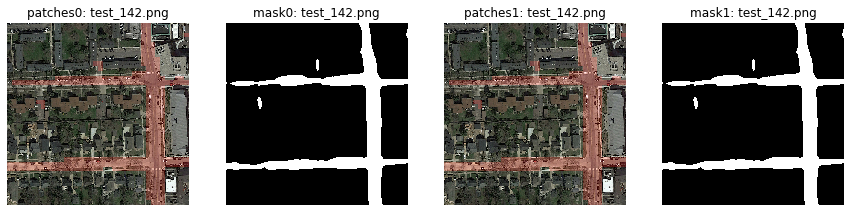

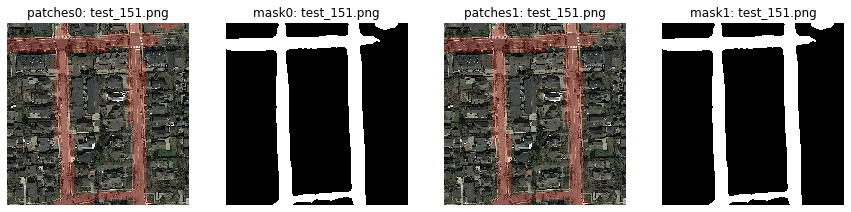

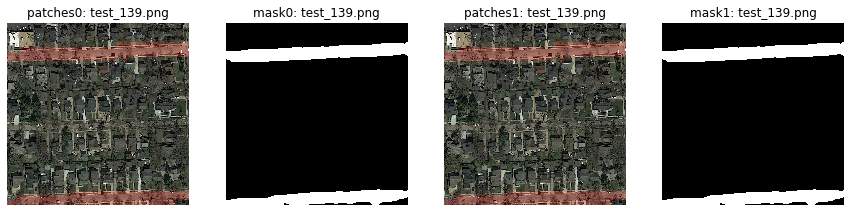

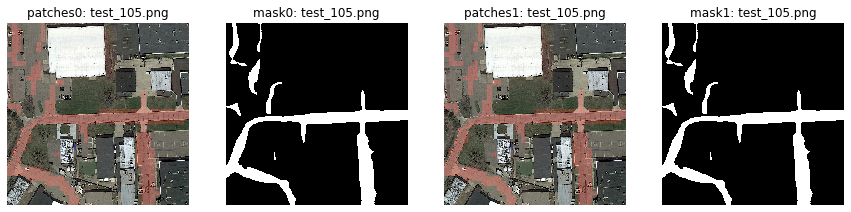

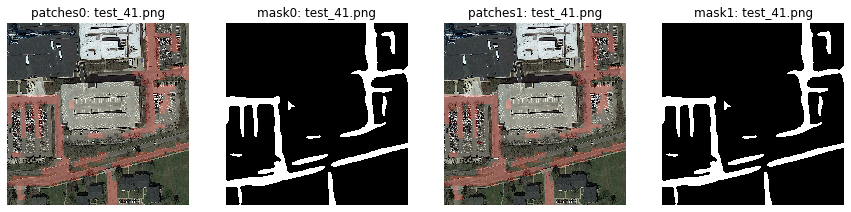

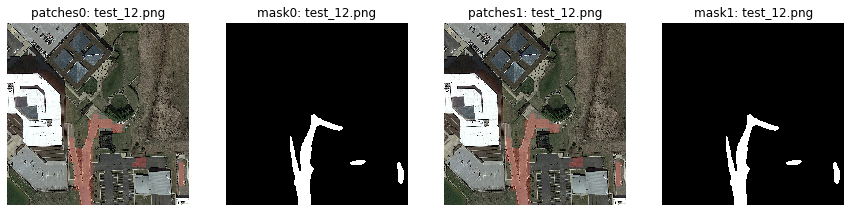

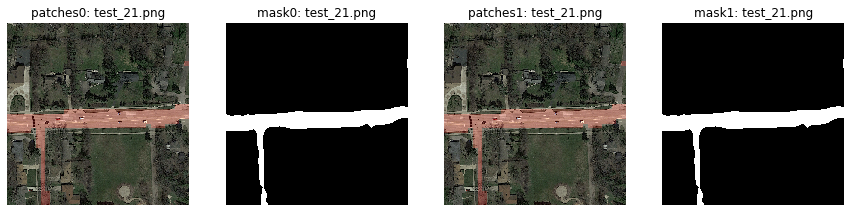

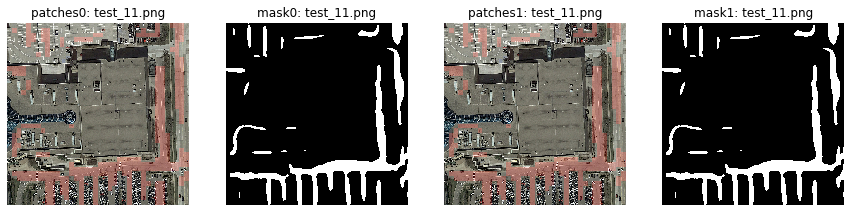

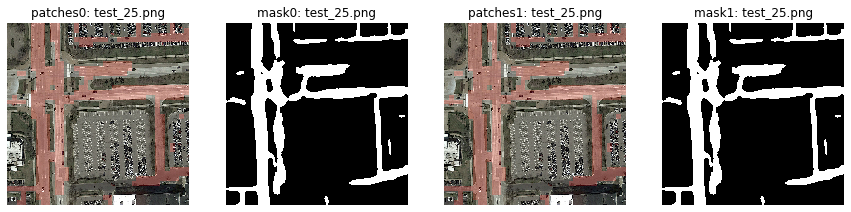

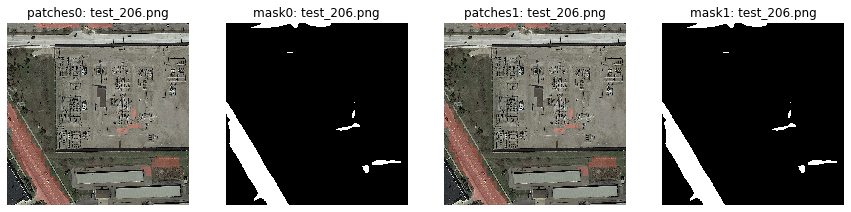

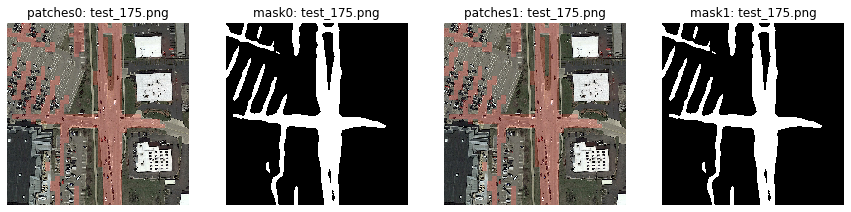

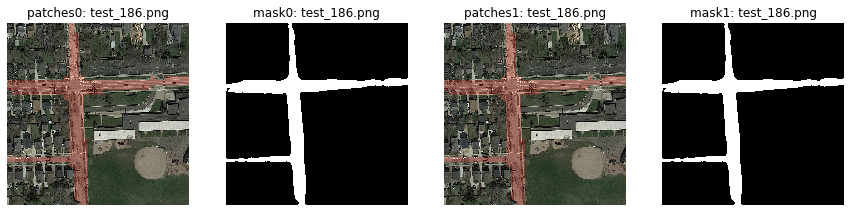

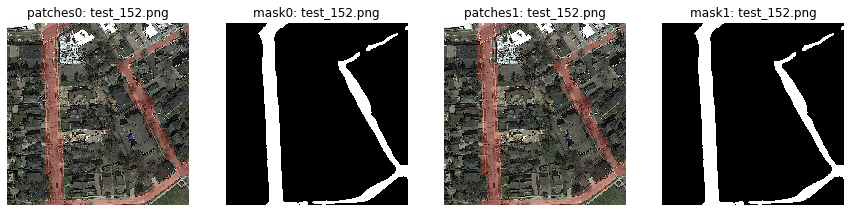

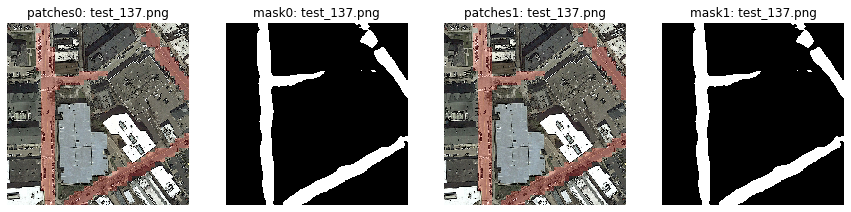

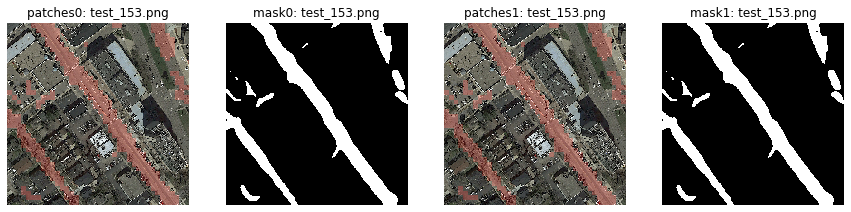

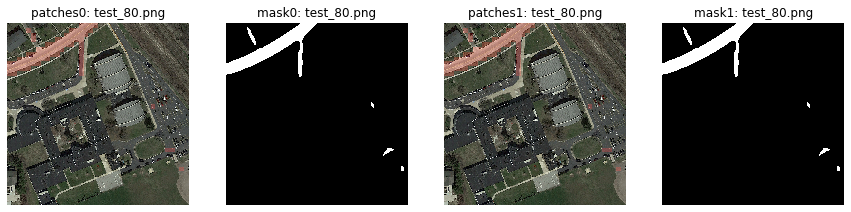

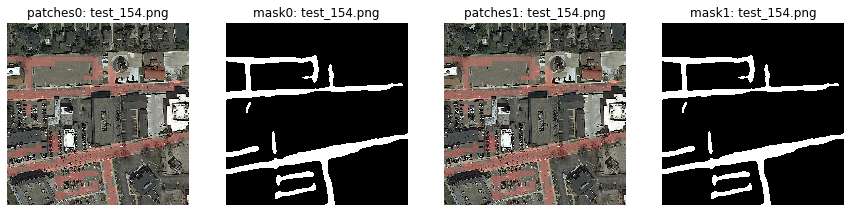

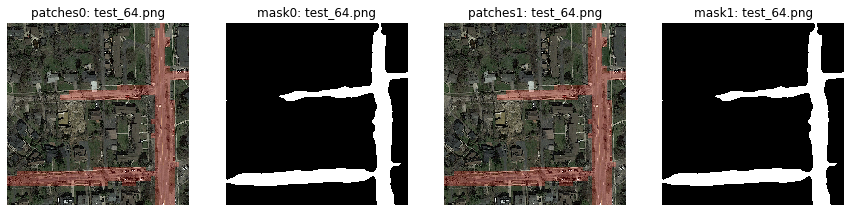

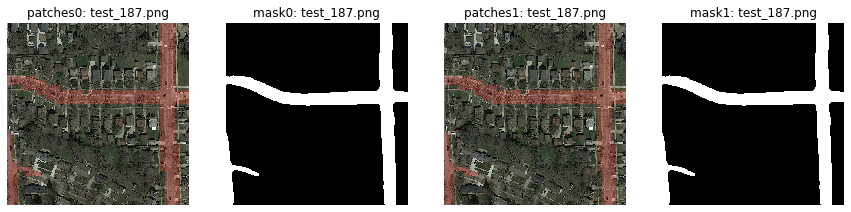

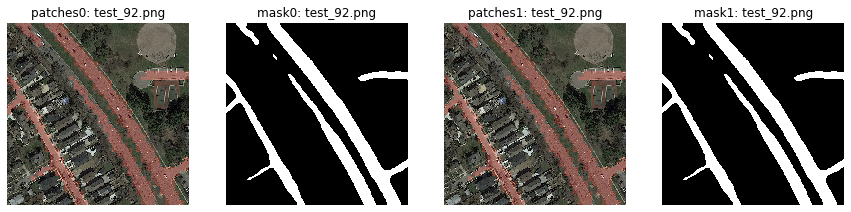

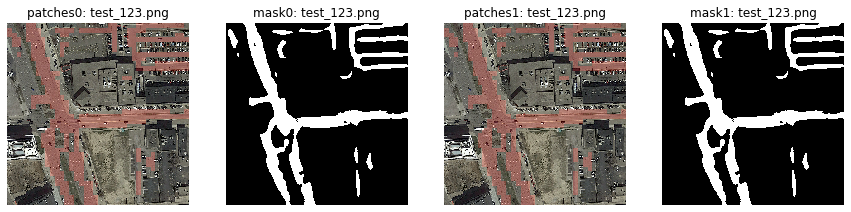

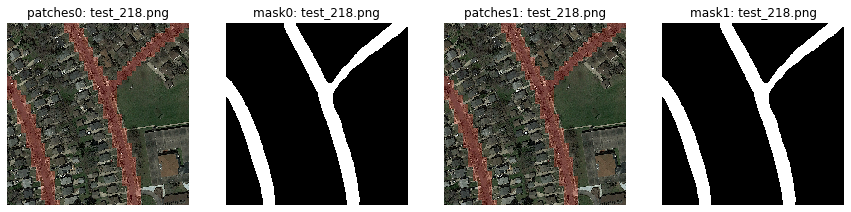

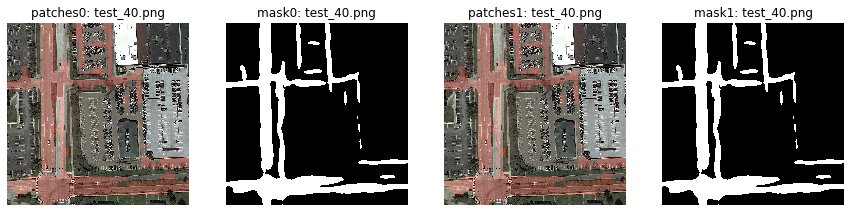

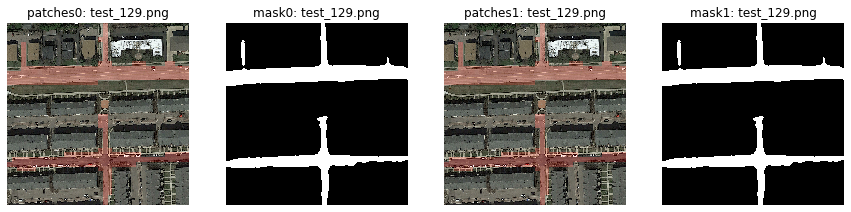

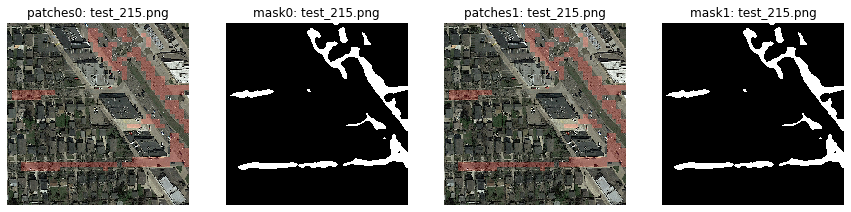

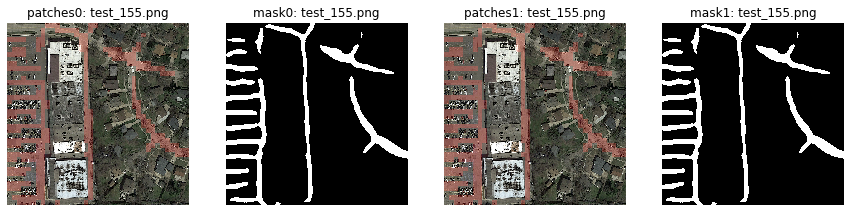

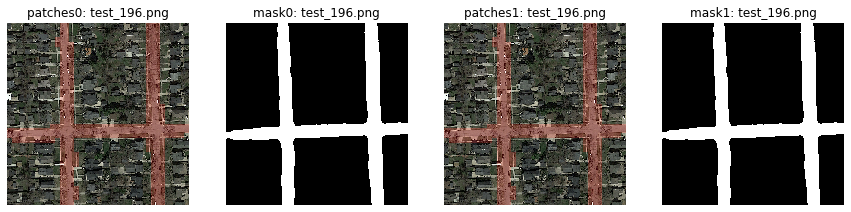

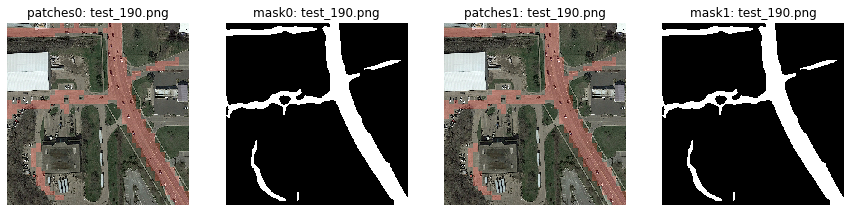

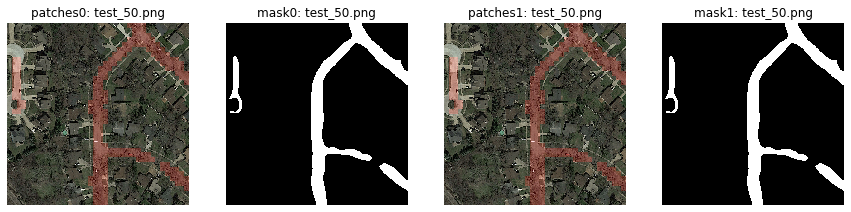

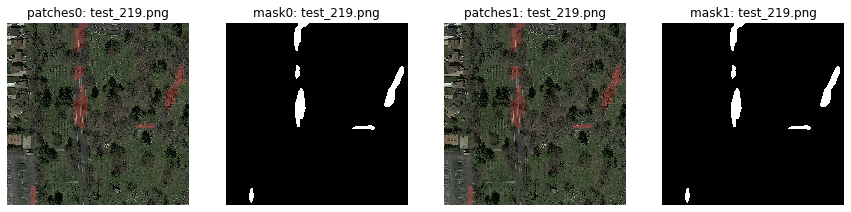

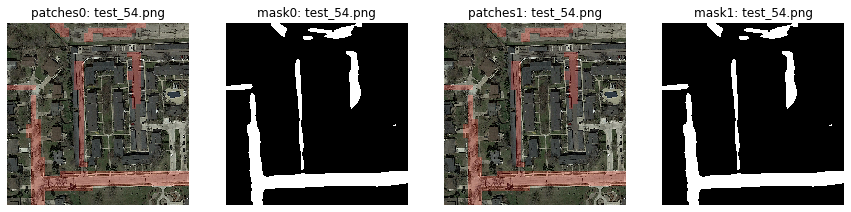

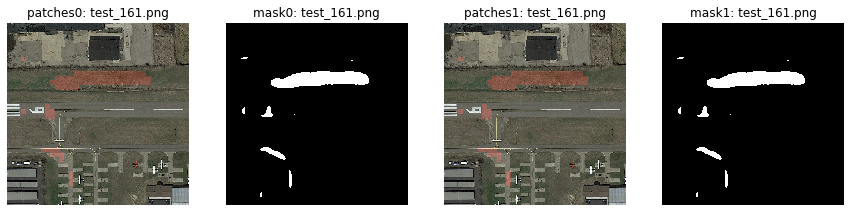

In [ ]:
plot_result_comparisons(img_paths=img_paths, results_paths=results_paths, show_img=False, show_mask=True, show_patches=True)